In [1]:
from model.model import efficientnet 
import torch
from dataloader.fasion import SimpleImageLoader
from dataloader.preprocess import trainpreprocess, valpreprocess,rotpreprocess
from PIL import Image
import  matplotlib.pyplot as plt
import numpy as np
import random

# Model

In [2]:
num_classes = 4
model = efficientnet(phi = 0, num_classes = 4) 

model.load_state_dict(torch.load('saved/models/fasion_efficientnet_b0_unsuper/model_90.pt'))
model.cuda()
model.eval()
a=0

RuntimeError: CUDA error: all CUDA-capable devices are busy or unavailable

# Dataset

## unsuper

In [24]:
root = '/home/jovyan/2020kaist/cs492/vision/datasets'
unsuper ='true'
batch_size = 4
worker = 2
rot_preprocess = rotpreprocess()
val_preprocess = valpreprocess()

trainset = SimpleImageLoader(root = root, split = 'unlabel', transform = rot_preprocess, unsuper = unsuper)
valset = SimpleImageLoader(root = root, split = 'validation', transform = val_preprocess, unsuper=unsuper)
num_classes = trainset.classnumber
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=worker)
valloader = torch.utils.data.DataLoader(valset, batch_size=batch_size, shuffle=False, num_workers=worker)

In [25]:
d = iter(trainloader)

In [29]:
data = d.next()


In [30]:
image = torch.cat([data[0], data[2], data[4], data[6]], dim=0)
label = torch.cat([data[1], data[3], data[5], data[7]], dim=0)
image = image.cuda()
label = label.cuda()

## Visualize dataset

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

TypeError: imshow() missing 1 required positional argument: 'X'

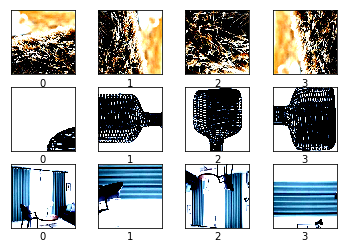

In [36]:
fig = plt.figure() # rows*cols 행렬의 i번째 subplot 생성
rows = 3
cols = 4
idx = 1
  
for i in range(rows):
    for j in range(cols):
        img = data[j*2][i]
        img = np.transpose(img, (1, 2, 0))
        ax = fig.add_subplot(rows, cols, idx)
        ax.imshow(img, interpolation='nearest')
        ax.set_xlabel(int(data[j*2+1][i]))
        ax.set_xticks([]), ax.set_yticks([])
        idx+=1
plt.imshow()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


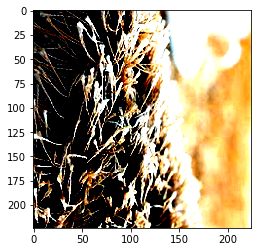

In [44]:
plt.imshow(np.transpose(image[4], (1, 2, 0)))

# Eval

In [53]:
pred = model(data[0].cuda())

In [49]:
model(data[0].cuda())

tensor([[ 6.6275, -6.8301, -5.3043, -5.5773],
        [ 6.8869, -7.3279, -5.6723, -6.1613],
        [ 6.5291, -6.7114, -5.2300, -5.5400],
        [ 6.6935, -7.2714, -5.3224, -5.8526]], device='cuda:0',
       grad_fn=<AddmmBackward>)

# loss

In [7]:
criterion = torch.nn.CrossEntropyLoss()

In [ ]:
#loss = criterion(pred, label)
loss = criterion(pred, data[1].cuda())

In [56]:
loss

tensor(1.1206e-05, device='cuda:0', grad_fn=<NllLossBackward>)

In [56]:
if 'None':
    print(1)

1


In [3]:
pred = torch.tensor([[0.1, -0.0112, -0.1331, -0.1506],
        [0.1,  0.0053,  0.0468,  0.0107],
        [0.1, -0.1733, -0.2177, -0.0361],
        [0.1, -0.0755, -0.1187, -0.0948],
        [ 0.0168, 0.1, -0.2415, -0.1702],
        [-0.1476,  0.1, -0.0141,  0.0088],
        [-0.0523,  0.1, -0.0149,  0.0092],
        [-0.1218, 0.1,  0.0263, -0.0509],
        [-0.1076, -0.0576, 0.1, -0.0581],
        [-0.0561,  0.0432, 0.1, -0.0867],
        [ 0.0109, -0.1303, 0.1, -0.0186],
        [-0.1008, -0.0578, 0.1, -0.0930],
        [ 0.0079, -0.0450, -0.0758,  0.1],
        [-0.1162,  0.0620, -0.0582, 0.1],
        [ 0.0914, -0.0721, -0.1424, 0.1],
        [-0.1249, -0.1661, -0.1171, 0.1]], device='cuda:0') 
label = torch.tensor([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3], device='cuda:0')

RuntimeError: CUDA error: all CUDA-capable devices are busy or unavailable

In [63]:
a = [1,2,3,4] 
random.shuffle(a)

In [64]:
a

[2, 4, 3, 1]